<div style="background-color: #4CAF50; color: white; padding: 10px; border-radius: 5px; display: flex; align-items: center;">
    <h1 style="margin: 0 auto; font-size: 30px; font-weight: bold; font-family: Helvetica">Lab1: การถดถอยเชิงเส้นอย่างง่าย (Simple Linear Regression)</h1>
</div>

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">เครื่องมือที่จะใช้ใน Lab นี้:</h1>

In [1]:
# นำเข้าไลบรารี numpy โดยตั้งชื่อว่า np
import numpy as np
# นำเข้าไลบรารี matplotlib โดยตั้งชื่อว่า plt
import matplotlib.pyplot as plt

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">โจทย์ปัญหา:</h1>

สมมติว่าเราต้องการโมเดลที่สามารถทำนายราคาบ้านจากขนาดของบ้าน โดยมีข้อมูลที่กำหนดให้เพียง 2 ข้อมูล ดังนี้:

- บ้านที่มีขนาด 1000 ตารางฟุตจะขายในราคา 300,000$
- บ้านที่มีขนาด 2000 ตารางฟุตจะขายในราคา 500,000$

ดังนั้นเราจึงสามารถสร้างตารางออกมาในรูปแบบดังนี้:

<div align="center">
    <table>
        <tr>
            <th>ขนาด (1000 ตารางฟุต)</th>
            <th>ราคา (พันดอลลาร์)</th>
        </tr>
        <tr>
            <td>1</td>
            <td>300</td>
        </tr>
        <tr>
            <td>2</td>
            <td>500</td>
        </tr>
    </table>
</div>


<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">1. สำรวจและวิเคราะห์ข้อมูลเบื้องต้น (Exploratory Data Analysis: EDA)</h1>


<h1 style="font-size: 18px;">1.1 สร้างตัวแปรเก็บข้อมูล</h1>


In [2]:
# สร้างตัวแปรที่ชื่อว่า X_train เพื่อเก็บข้อมูลขนาดของบ้าน
X_train = np.array([1.0, 2.0])       # หน่วยเป็น 1000 ตารางฟุต
# สร้างตัวแปรที่ชื่อว่า y_train เพื่อเก็บข้อมูลราคาของบ้าน
y_train = np.array([300.0, 500.0])   # หน่วยเป็น 1000 ดอลลาร์

<h1 style="font-size: 18px;">1.2 แสดงกราฟความสัมพันธ์ของข้อมูล</h1>

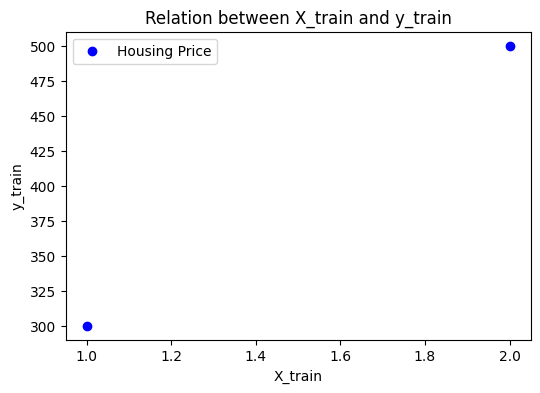

In [3]:
plt.figure(figsize=(6, 4)) # กำหนดขนาดของกราฟ
# พล็อตกราฟแบบจุด, โดยใช้ค่า X_train และ y_train, ให้สีจุดเป็นสีฟ้า, ชื่อจุดชื่อ Housing Price
plt.scatter(X_train, y_train, color='blue',label='Housing Price')
plt.title('Relation between X_train and y_train')  # ชื่อกราฟ
plt.xlabel('X_train')  # ชื่อแกน x
plt.ylabel('y_train')  # ชื่อแกน y
plt.legend()  # สั่งให้แสดงชื่อจุด
plt.show()  # แสดงกราฟ

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">2. หลักการทำงานของโมเดล Simple Linear Regression</h1>

<h1 style=" font-size: 18px;">สมการ Simple Linear Regression:</h1>

$$Y \approx w \cdot X + b$$

โดยที่:
- $Y$ คือตัวแปรตาม (Dependent Variable) ซึ่งเป็นผลลัพธ์หรือค่าที่เราต้องการทำนายหรือวัด
- $X$ คือตัวแปรอิสระ (Independent Variable) ซึ่งเป็นข้อมูลหรือตัวแปรที่มีผลต่อ $Y$ และที่เราใช้ในการทำนายหรือวัด $Y$
- $w$ หรืออาจเรียกว่า weight คือพารามิเตอร์หรือความชัน (Coefficient) ซึ่งแสดงถึงความสัมพันธ์ระหว่าง $X$ และ $Y$ และบ่งบอกว่าการเปลี่ยนแปลงใน $X$ มีผลต่อ $Y$ อย่างไร
- $b$ หรืออาจเรียกว่า bias คือค่าคงที่ (Intercept) ซึ่งคือค่าของ $Y$ เมื่อ $X$ มีค่าเป็นศูนย์ หรือค่าตัดแกน $Y$ ที่ $X$ เท่ากับศูนย์

<h1 style="font-size: 18px;">2.1 สร้างเส้นตรงสมมติ</h1>

In [4]:
# สร้างตัวแปรเก็บ weight และ bias ของสมการ linear regression
w = 250  # ตัวแปรที่ใช้เก็บ weight
b = 100  # ตัวแปรที่ใช้เก็บ bias

y_pred = w * X_train + b # สร้างสมการ linear Regression เก็บไว้ที่ตัวแปร y_pred
print('y =', y_pred, ', type =', type(y_pred)) # แสดงค่า y_pred และ type ของ y_pred

y = [350. 600.] , type = <class 'numpy.ndarray'>


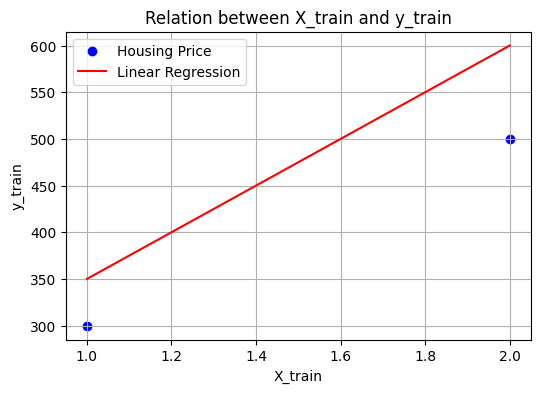

In [5]:
plt.figure(figsize=(6, 4)) # กำหนดขนาดของกราฟ
# พล็อตกราฟแบบจุด, โดยใช้ค่า X_train และ y_train, ให้สีจุดเป็นสีฟ้า, ชื่อจุดชื่อ Housing Price
plt.scatter(X_train, y_train, color='blue',label='Housing Price')
plt.plot(X_train, y_pred, color='red', label='Linear Regression')  # พล็อตสมการ linear Regression
plt.title('Relation between X_train and y_train')  # ชื่อกราฟ
plt.xlabel('X_train')  # ชื่อแกน x
plt.ylabel('y_train')  # ชื่อแกน y
plt.legend()  # สั่งให้แสดงชื่อจุด
plt.grid()  # แสดงเส้น grid บนกราฟ
plt.show()  # แสดงกราฟ

<h1 style="font-size: 18px;">2.2 คำนวณค่า Cost ที่เกิดขึ้น</h1>

<h1 style="font-size: 18px;">ในที่นี้จะใช้ Mean Square Error (MSE) เป็นค่า Cost ที่ใช้วัดความแม่นยำของ Simple Linear Regression Model นี้</h1>
<h1 style="font-size: 18px;">Mean Square Error (MSE) สามารถคำนวณได้ดังนี้:</h1>

$$ J(w,b) = MSE = \frac{1}{2m} \sum_{i=0}^{m-1} (y_i - \hat{y}_i)^2 $$
- $J(w,b)$ คือค่า Cost โดยในที่นี้เราใช้เป็น $MSE$
- $m$ คือจำนวนข้อมูล
- $y_i$ คือค่าจริง (actual) สำหรับข้อมูลลำดับที่ $i$
- $\hat{y}_i$ คือค่าที่ทำนาย (predict) สำหรับข้อมูลลำดับที่ $i$

In [6]:
# สร้างตัวแปรเก็บ weight และ bias ของสมการ linear regression
m = len(X_train) # กำหนดจำนวนข้อมูล เก็บไว้ในตัวแปร m
w = 250 # ตัวแปรที่ใช้เก็บ weight
b = 100 # ตัวแปรที่ใช้เก็บ bias

y_pred = w * X_train + b # สร้างสมการ linear Regression เก็บไว้ที่ตัวแปร y_pred

mse = (1 / (2 * m)) * ((y_train - y_pred) ** 2).sum() # คำนวณค่า MSE
print('MSE =', mse) # แสดงค่า MSE 

MSE = 3125.0


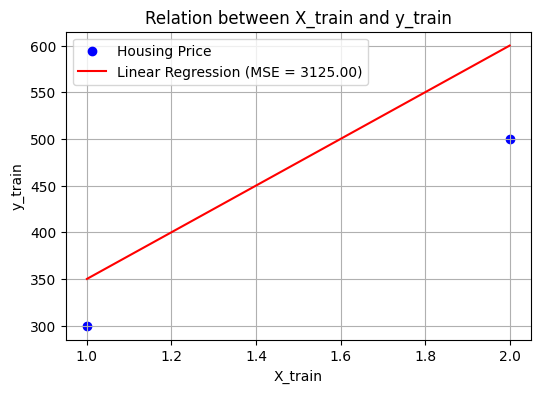

In [7]:
plt.figure(figsize=(6, 4)) # กำหนดขนาดของกราฟ
# พล็อตกราฟแบบจุด, โดยใช้ค่า X_train และ y_train, ให้สีจุดเป็นสีฟ้า, ชื่อจุดชื่อ Housing Price
plt.scatter(X_train, y_train, color='blue',label='Housing Price')
plt.plot(X_train, y_pred, color='red', label=f'Linear Regression (MSE = {mse:.2f})')  # พล็อตสมการ linear Regression พร้อม ค่า MSE
plt.title('Relation between X_train and y_train')  # ชื่อกราฟ
plt.xlabel('X_train')  # ชื่อแกน x
plt.ylabel('y_train')  # ชื่อแกน y
plt.legend()  # สั่งให้แสดงชื่อจุด
plt.grid()  # แสดงเส้น grid บนกราฟ
plt.show()  # แสดงกราฟ

<h1 style="font-size: 18px;">2.3 ทำ Gradient Descent จากค่า Cost ที่หาได้จากสมการนี้</h1>

$$ J(w,b) = MSE = \frac{1}{2m} \sum_{i=0}^{m-1} (y_i - \hat{y}_i)^2 $$

การทำ Gradient Descent คือการที่เราต้องการปรับปรุงค่า $w$ และ $b$ ให้เหมาะสมกับชุดข้อมูลมากที่สุด สามารถทำได้ด้วยการหา gradient ของฟังก์ขัน Cost $J(w,b)$ (ในที่นี้เราใช้ MSE) เทียบกับ $w$ และ $b$ จากนั้นก็อัพเดท $w$ และ $b$ ใหม่ หรือก็คือเราจะ

ทำซ้ำจนกว่าจะลู่เข้า:

$$
\begin{align*}
w &:= w - \alpha \frac{\partial J(w,b)}{\partial w} \\
b &:= b - \alpha \frac{\partial J(w,b)}{\partial b}
\end{align*}
$$

โดยที่:
- $w$ คือ พารามิเตอร์ weight
- $b$ คือ พารามิเตอร์ bias 
- $\alpha$ คือ อัตราการเรียนรู้ (learning rate) ที่ควบคุมขนาดของการอัพเดทในแต่ละรอบการทำงาน
- $\frac{\partial J(w,b)}{\partial w}$ และ $\frac{\partial J(w,b)}{\partial b}$ คือ gradient ของฟังก์ชัน Cost เทียบกับ $w$ และ $b$ ตามลำดับ ซึ่งสามารถคำนวณได้ดังนี้:

$$
\frac{\partial J(w,b)}{\partial w} = \frac{1}{m} \sum_{i=0}^{m-1} (\hat{y}^{(i)} - y^{(i)})x^{(i)}
$$

$$
\frac{\partial J(w,b)}{\partial b} = \frac{1}{m} \sum_{i=0}^{m-1} (\hat{y}^{(i)} - y^{(i)})
$$


In [8]:
alpha = 0.01  # กำหนดค่า learning rate เก็บไว้ในตัวแปร alpha
num_iterations = 100  # กำหนดจำนวนครั้งในการทำ Gradient Descent เก็บไว้ในตัวแปร num_iterations
m = len(X_train)  # กำหนดจำนวนข้อมูล เก็บไว้ในตัวแปร m
w = 250 # กำหนดค่าเริ่มต้นของ weights
b = 100 # กำหนดค่าเริ่มต้นของ bias

# ดำเนินการทำ Gradient Descent
for iteration in range(num_iterations):
    # คำนวณ y_pred จาก w และ b 
    y_pred = w * X_train + b
    
    # คำนวณ gradients
    dw = (1/m) * np.sum((y_pred - y_train) * X_train)
    db = (1/m) * np.sum(y_pred - y_train)
    
    # อัพเดทค่า w และ b
    w = w - alpha * dw
    b = b - alpha * db

    # คำนวณค่า Cost ใหม่
    mse = (1 / (2 * m)) * ((y_train - y_pred) ** 2).sum()
    print(f'Iteration {iteration+1}/{num_iterations}: MSE = {mse:.2f}, w = {w:.2f}, b = {b:.2f}')

print('Final w:', w)
print('Final b:', b)

Iteration 1/100: MSE = 3125.00, w = 248.75, b = 99.25
Iteration 2/100: MSE = 2916.14, w = 247.54, b = 98.53
Iteration 3/100: MSE = 2721.35, w = 246.38, b = 97.83
Iteration 4/100: MSE = 2539.68, w = 245.25, b = 97.15
Iteration 5/100: MSE = 2370.24, w = 244.16, b = 96.50
Iteration 6/100: MSE = 2212.22, w = 243.11, b = 95.88
Iteration 7/100: MSE = 2064.84, w = 242.09, b = 95.27
Iteration 8/100: MSE = 1927.38, w = 241.11, b = 94.69
Iteration 9/100: MSE = 1799.19, w = 240.16, b = 94.12
Iteration 10/100: MSE = 1679.62, w = 239.25, b = 93.58
Iteration 11/100: MSE = 1568.11, w = 238.36, b = 93.05
Iteration 12/100: MSE = 1464.11, w = 237.51, b = 92.55
Iteration 13/100: MSE = 1367.11, w = 236.68, b = 92.06
Iteration 14/100: MSE = 1276.65, w = 235.88, b = 91.59
Iteration 15/100: MSE = 1192.27, w = 235.11, b = 91.14
Iteration 16/100: MSE = 1113.58, w = 234.37, b = 90.70
Iteration 17/100: MSE = 1040.19, w = 233.65, b = 90.28
Iteration 18/100: MSE = 971.74, w = 232.95, b = 89.87
Iteration 19/100: MS

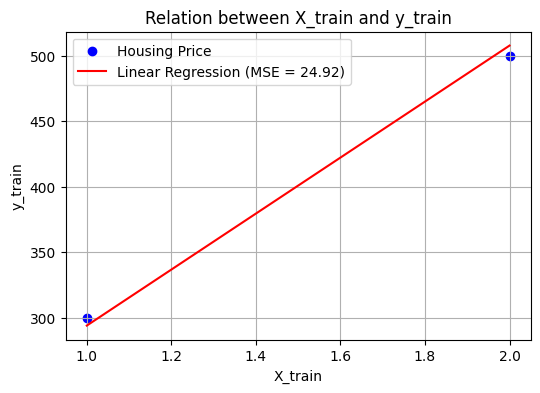

In [9]:
y_pred = w * X_train + b
plt.figure(figsize=(6, 4)) # กำหนดขนาดของกราฟ
# พล็อตกราฟแบบจุด, โดยใช้ค่า X_train และ y_train, ให้สีจุดเป็นสีฟ้า, ชื่อจุดชื่อ Housing Price
plt.scatter(X_train, y_train, color='blue',label='Housing Price')
plt.plot(X_train, y_pred, color='red', label=f'Linear Regression (MSE = {mse:.2f})')  # พล็อตสมการ linear Regression พร้อม ค่า MSE
plt.title('Relation between X_train and y_train')  # ชื่อกราฟ
plt.xlabel('X_train')  # ชื่อแกน x
plt.ylabel('y_train')  # ชื่อแกน y
plt.legend()  # สั่งให้แสดงชื่อจุด
plt.grid()  # แสดงเส้น grid บนกราฟ
plt.show()  # แสดงกราฟ

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">3. การใช้ Simple Linear Regression ด้วย Scikit-Learn Library</h1>


In [10]:
# นำเข้าไลบรารี sklearn.linear_model เพื่อเรียกใช้ Linear Regression Model
from sklearn.linear_model import LinearRegression 

# นำเข้าไลบรารี sklearn.metrics เพื่อเรียกใช้ mean_squared_error
from sklearn.metrics import mean_squared_error

<h1 style="font-size: 18px;">3.1 สำรวจและวิเคราะห์ข้อมูลเบื้องต้น (Exploratory Data Analysis: EDA)</h1>

In [11]:
# สร้างตัวแปรที่ชื่อว่า X_train เพื่อเก็บข้อมูลขนาดของบ้าน
X_train = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0])       # หน่วยเป็น 1000 ตารางฟุต
# สร้างตัวแปรที่ชื่อว่า y_train เพื่อเก็บข้อมูลราคาของบ้าน
y_train = np.array([350.0, 570.0, 780.0, 910.0, 1050.0, 1280.0, 1720.0, 1980.0, 2180.0, 2310.0])   # หน่วยเป็น 1000 ดอลลาร์

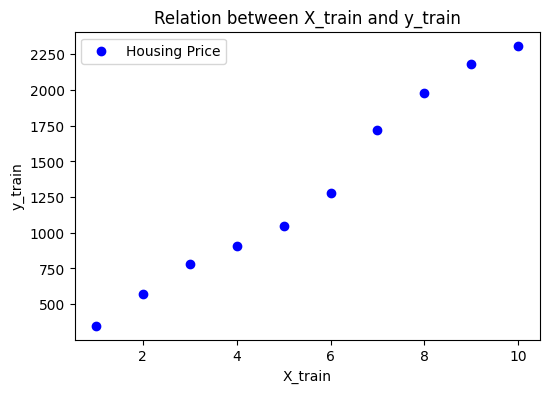

In [12]:
plt.figure(figsize=(6, 4)) # กำหนดขนาดของกราฟ
# พล็อตกราฟแบบจุด, โดยใช้ค่า X_train และ y_train, ให้สีจุดเป็นสีฟ้า, ชื่อจุดชื่อ Housing Price
plt.scatter(X_train, y_train, color='blue',label='Housing Price')
plt.title('Relation between X_train and y_train')  # ชื่อกราฟ
plt.xlabel('X_train')  # ชื่อแกน x
plt.ylabel('y_train')  # ชื่อแกน y
plt.legend()  # สั่งให้แสดงชื่อจุด
plt.show()  # แสดงกราฟ

<h1 style="font-size: 18px;">3.2 สร้างโมเดลและเทรนโมเดล</h1>

In [13]:
model = LinearRegression() # สร้างโมเดล Linear Regression โดยเก็บไว้ที่ตัวแปร model

X_train = X_train.reshape(-1, 1) # เปลี่ยน shape ของ X_train จาก 1D เป็น 2D array (เป็นข้อบังคับของ Scikit-Learn)

model.fit(X_train, y_train) # เทรนโมเดล หรือ ให้โมเดลเรียนรู้ชุดข้อมูลที่เราป้อนให้ นั่นคือ X_train และ y_train

LinearRegression()

In [14]:
y_pred = model.predict(X_train) # ให้โมเดลทำนายราคาบ้าน จากขนาดของบ้าน หรือก็คือ X_train เก็บไว้ในตัวแปรชื่อ y_pred

slope = model.coef_[0]  # เรียกค่า w ที่ได้ เก็บไว้ในตัวแปรชื่อ slope

intercept = model.intercept_ # เรียกค่า b ที่ได้ เก็บไว้ในตัวแปรชื่อ intercept

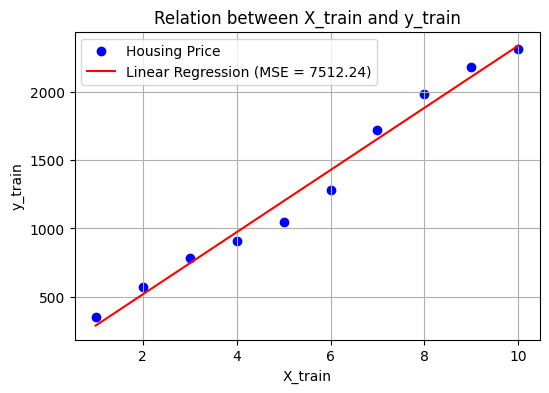

w: 227.70
b: 60.67
Mean Squared Error (MSE): 7512.24


In [15]:
mse = mean_squared_error(y_train, y_pred) # คำนวณ mse ด้วย Scikit-Learn Library

plt.figure(figsize=(6, 4)) # กำหนดขนาดของกราฟ
# พล็อตกราฟแบบจุด, โดยใช้ค่า X_train และ y_train, ให้สีจุดเป็นสีฟ้า, ชื่อจุดชื่อ Housing Price
plt.scatter(X_train, y_train, color='blue',label='Housing Price')
plt.plot(X_train, y_pred, color='red', label=f'Linear Regression (MSE = {mse:.2f})')  # พล็อตสมการ linear Regression พร้อม ค่า MSE
plt.title('Relation between X_train and y_train')  # ชื่อกราฟ
plt.xlabel('X_train')  # ชื่อแกน x
plt.ylabel('y_train')  # ชื่อแกน y
plt.legend()  # สั่งให้แสดงชื่อจุด
plt.grid()  # แสดงเส้น grid บนกราฟ
plt.show()  # แสดงกราฟ

# Display the results
print(f'w: {slope:.2f}')
print(f'b: {intercept:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')

<h1 style="font-size: 18px;">3.3 การทำนายข้อมูลชุดใหม่ (Unseen Data)</h1>

In [16]:
X_unseen = np.array([20.0, 25.0, 30.0]) # สมมติเรามีข้อมูลขนาดของบ้านเข้ามาใหม่ โดยที่ไม่เคยมีในชุดข้อมูลก่อน

y_pred_unseen = model.predict(X_unseen.reshape(-1, 1)) # ทำนายราคาของบ้านจากข้อมูล X_unseen ด้วยโมเดลที่เราเทรนมาแล้ว

# Display the predictions
print("การทำนายข้อมูลชุดใหม่:")
for i in range(len(X_unseen)):
    print(f"ขนาดของบ้าน (1000 ตารางฟุต) = {X_unseen[i]:.2f} -> ราคาของบ้าน (1000 ดอลล่าร์) = {y_pred_unseen[i]:.2f}")

การทำนายข้อมูลชุดใหม่:
ขนาดของบ้าน (1000 ตารางฟุต) = 20.00 -> ราคาของบ้าน (1000 ดอลล่าร์) = 4614.61
ขนาดของบ้าน (1000 ตารางฟุต) = 25.00 -> ราคาของบ้าน (1000 ดอลล่าร์) = 5753.09
ขนาดของบ้าน (1000 ตารางฟุต) = 30.00 -> ราคาของบ้าน (1000 ดอลล่าร์) = 6891.58
